In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv("TRAIN.csv")

In [4]:
df_train.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [5]:
df_train.shape

(100000, 9)

In [6]:
df_test = pd.read_csv("TEST.csv")

In [7]:
df_test.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,1543364124206,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,1543364124206,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,1543364124206,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [8]:
df_test.shape

(25000, 8)

In [9]:
df_train.dtypes


index                 int64
time_stamp            int64
cab_provider         object
source               object
destination          object
distance            float64
surge_multiplier    float64
cab_type             object
fare                float64
dtype: object

In [10]:
df_train.head(3)

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5


In [11]:
df_train.drop('time_stamp', axis = 1, inplace = True)

In [12]:
df_train.head(3)

,index,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5


In [13]:
df_test.drop('time_stamp', axis = 1, inplace = True)

In [14]:
df_test.head()

,index,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [15]:
df_train.describe()

,index,distance,surge_multiplier,fare
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,2.188783,1.014945,16.571013
std,28867.657797,1.142837,0.095462,9.333901
min,0.000000,0.020000,1.000000,2.500000
25%,24999.750000,1.280000,1.000000,9.000000
50%,49999.500000,2.150000,1.000000,13.500000
75%,74999.250000,2.930000,1.000000,22.500000
max,99999.000000,7.500000,3.000000,92.000000


In [16]:
df_train.isnull().sum()

index               0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
fare                0
dtype: int64

In [17]:
df_test.isnull().sum()

index               0
cab_provider        0
source              0
destination         0
distance            0
surge_multiplier    0
cab_type            0
dtype: int64

In [18]:
df_train['cab_provider'].value_counts()

Uber    51863
Lyft    48137
Name: cab_provider, dtype: int64

In [19]:
df_train['source'].value_counts()

North End                  8637
Financial District         8540
Theatre District           8445
South Station              8423
Back Bay                   8375
Haymarket Square           8337
Northeastern University    8333
Fenway                     8277
Beacon Hill                8277
Boston University          8231
West End                   8192
North Station              7933
Name: source, dtype: int64

In [20]:
df_train['destination'].value_counts()

Back Bay                   8547
North End                  8543
Financial District         8497
Theatre District           8469
North Station              8419
Fenway                     8352
West End                   8298
Northeastern University    8259
South Station              8222
Boston University          8206
Haymarket Square           8180
Beacon Hill                8008
Name: destination, dtype: int64

In [21]:
df_train['cab_type'].value_counts()

Black           8744
Black SUV       8712
UberXL          8676
UberX           8588
WAV             8585
UberPool        8558
Lyft XL         8115
Lux Black XL    8065
Lux             8060
Shared          7998
Lyft            7957
Lux Black       7942
Name: cab_type, dtype: int64

In [22]:
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization

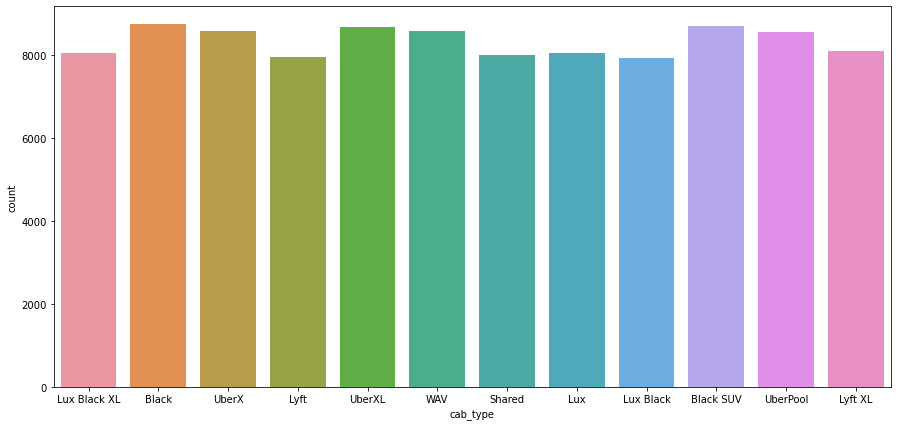

In [23]:
# Count plot on cab_type count
plt.figure(figsize=(15,7))
sns.countplot(x="cab_type", data=df_train)

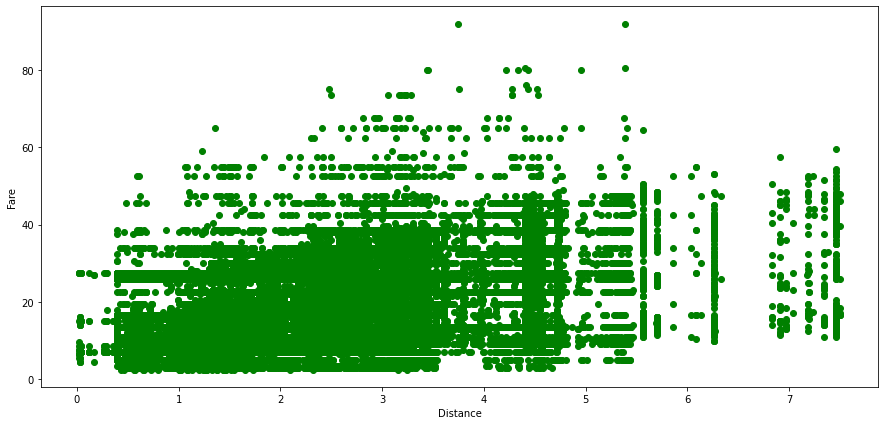

In [24]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = df_train['distance'],y = df_train['fare'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

In [25]:
df_train.columns

Index(['index', 'cab_provider', 'source', 'destination', 'distance',
       'surge_multiplier', 'cab_type', 'fare'],
      dtype='object')

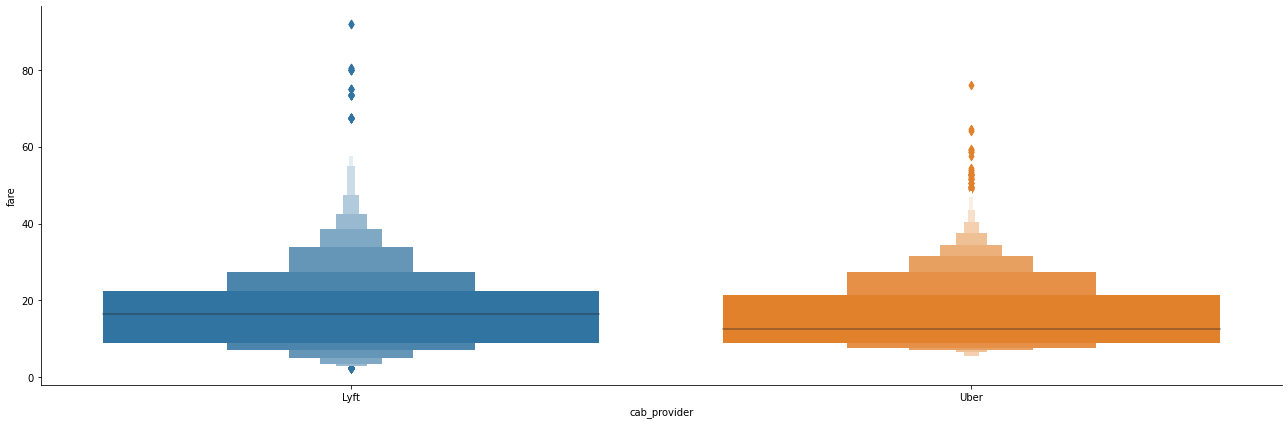

In [26]:
# cab_provider vs Price
sns.catplot(y = "fare", x = "cab_provider", data = df_train.sort_values("fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

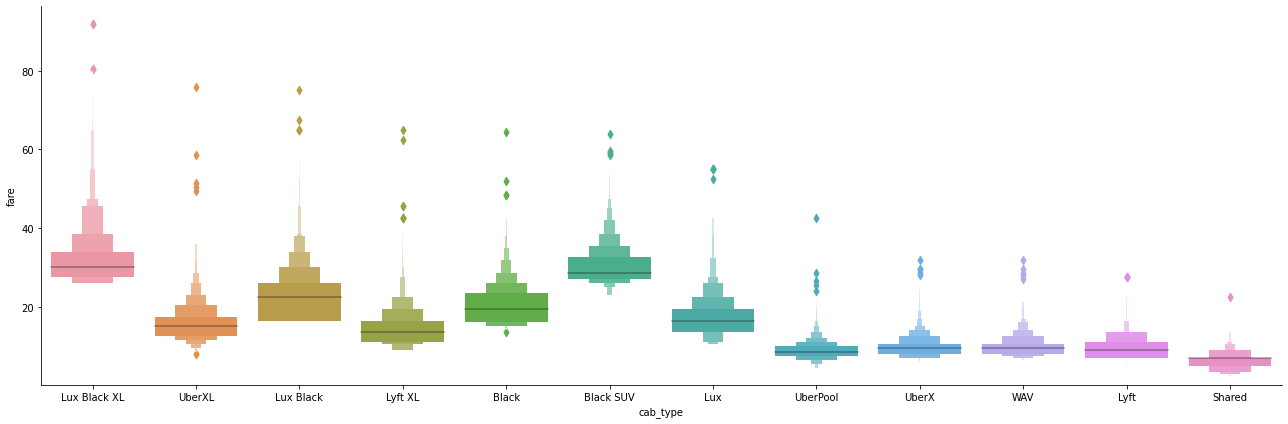

In [27]:
# cab_type vs Price
sns.catplot(y = "fare", x = "cab_type", data = df_train.sort_values("fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

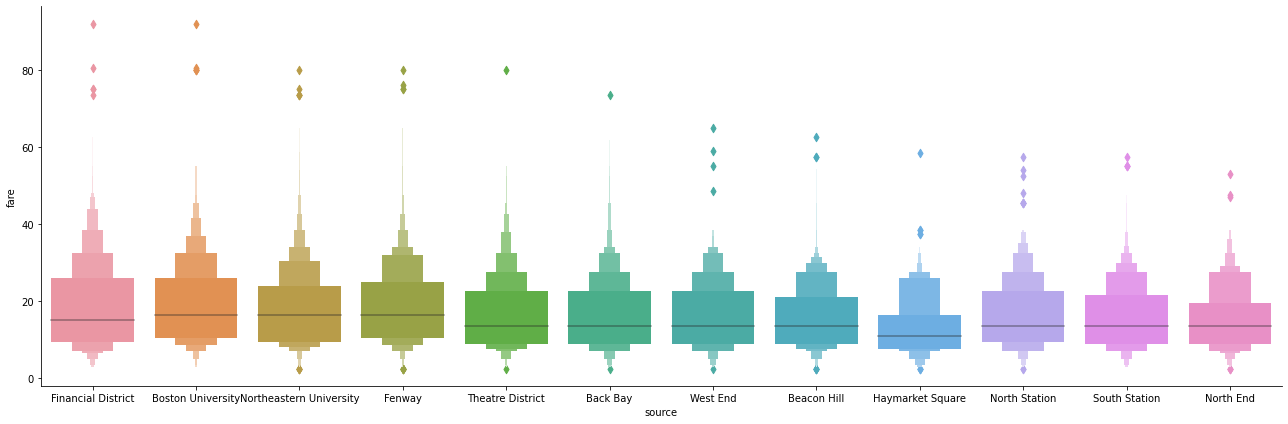

In [28]:
# source vs Price
sns.catplot(y = "fare", x = "source", data = df_train.sort_values("fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

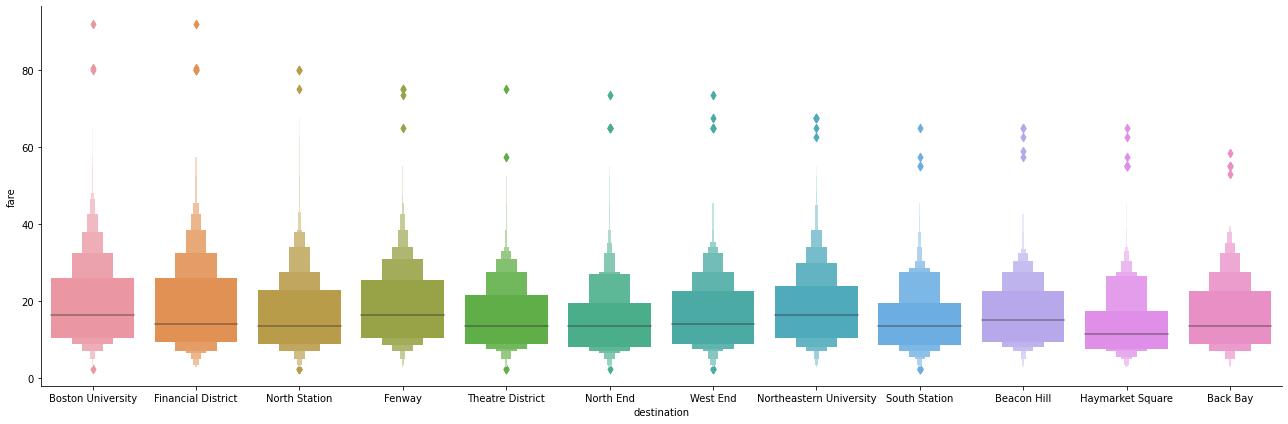

In [29]:
# destination vs Price
sns.catplot(y = "fare", x = "destination", data = df_train.sort_values("fare", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [30]:
# As cab_provider is Nominal Categorical data we will perform OneHotEncoding

cab_provider_1 = df_train[["cab_provider"]]

cab_provider_1 = pd.get_dummies(cab_provider_1, drop_first= True)

cab_provider_1.head()

,cab_provider_Uber
0,0
1,1
2,1
3,0
4,1


In [31]:
# As source is Nominal Categorical data we will perform OneHotEncoding

source_1 = df_train[["source"]]

source_1 = pd.get_dummies(source_1, drop_first= True)

source_1.head()

,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [32]:
# As destination is Nominal Categorical data we will perform OneHotEncoding

destination_1 = df_train[["destination"]]

destination_1 = pd.get_dummies(destination_1, drop_first= True)

destination_1.head()

,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
# As cab_type is Nominal Categorical data we will perform OneHotEncoding

cab_type_1 = df_train[["cab_type"]]

cab_type_1 = pd.get_dummies(cab_type_1, drop_first= True)

cab_type_1.head()

,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [34]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([df_train, cab_type_1, destination_1, source_1,cab_provider_1], axis = 1)

In [35]:
data_train.head()

,index,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,cab_type_Black SUV,cab_type_Lux,...,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,cab_provider_Uber
0,0,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [36]:
data_train.drop(["cab_provider", "source", "destination","cab_type"], axis = 1, inplace = True)


In [37]:
data_train.head()

,index,distance,surge_multiplier,fare,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,...,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,cab_provider_Uber
0,0,3.03,1.0,34.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.30,1.0,18.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,2.71,1.0,19.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3,2.43,1.0,10.5,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,4,2.71,1.0,32.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [38]:
data_train.drop(["index"], axis = 1, inplace=True)

In [39]:
data_train.head()

,distance,surge_multiplier,fare,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,...,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,cab_provider_Uber
0,3.03,1.0,34.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.30,1.0,18.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2.71,1.0,19.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2.43,1.0,10.5,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.71,1.0,32.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


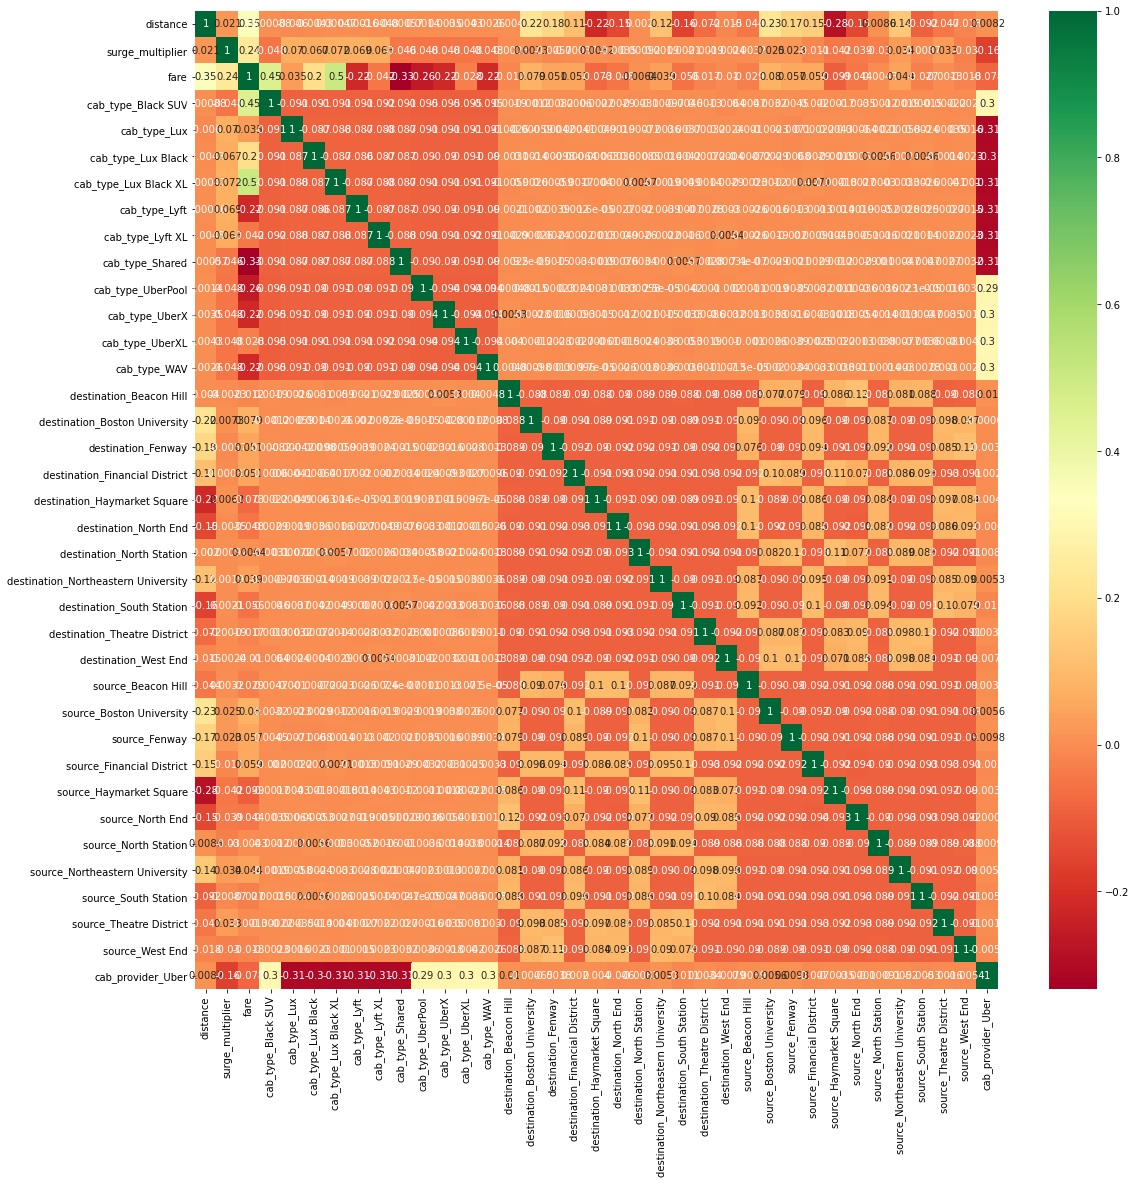

In [40]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [41]:
X = data_train.loc[:,['distance', 'surge_multiplier','cab_type_Black SUV',
       'cab_type_Lux', 'cab_type_Lux Black', 'cab_type_Lux Black XL',
       'cab_type_Lyft', 'cab_type_Lyft XL', 'cab_type_Shared',
       'cab_type_UberPool', 'cab_type_UberX', 'cab_type_UberXL',
       'cab_type_WAV', 'destination_Beacon Hill',
       'destination_Boston University', 'destination_Fenway',
       'destination_Financial District', 'destination_Haymarket Square',
       'destination_North End', 'destination_North Station',
       'destination_Northeastern University', 'destination_South Station',
       'destination_Theatre District', 'destination_West End',
       'source_Beacon Hill', 'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'cab_provider_Uber']]

In [42]:
y = data_train['fare']
y.head()

0    34.0
1    18.5
2    19.5
3    10.5
4    32.0
Name: fare, dtype: float64

In [43]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [44]:
print(selection.feature_importances_)


[1.39040018e-01 4.13623882e-02 2.58309390e-01 2.27208814e-03
 9.02728217e-02 2.57954737e-01 4.05143263e-02 6.12111393e-03
 4.57460758e-02 2.53053397e-02 2.64117927e-02 8.15529975e-03
 3.52680277e-02 8.81552213e-04 8.67408064e-04 3.43377250e-04
 5.37307052e-03 2.23789270e-04 4.17264058e-04 7.15708747e-04
 6.44130056e-04 7.11791045e-04 3.71776376e-04 3.52843905e-04
 1.05227210e-03 8.79702991e-04 3.58164413e-04 4.04948741e-03
 6.37327208e-04 9.18630728e-04 2.59384317e-04 5.14836327e-04
 3.87968933e-04 4.16348507e-04 2.59762989e-04 2.62998349e-03]


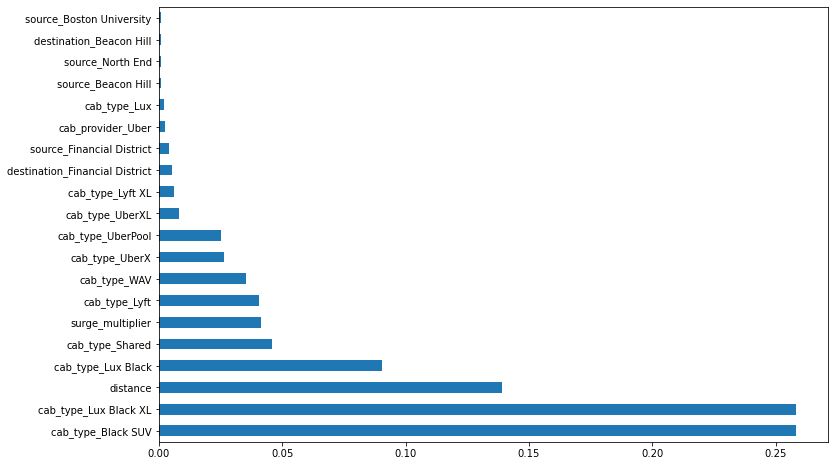

In [45]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
y_pred = reg_rf.predict(X_test)


In [49]:
reg_rf.score(X_train, y_train)


0.9758093069977665

In [50]:
reg_rf.score(X_test, y_test)


0.9671617711557806

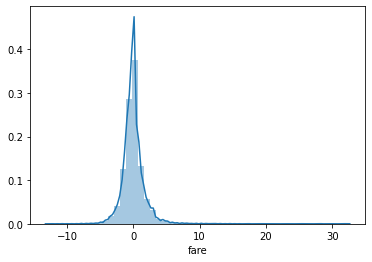

In [51]:

sns.distplot(y_test-y_pred)
plt.show()

In [52]:
from sklearn import metrics


In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.0612248469561505
MSE: 2.8345541705127477
RMSE: 1.6836134266846257


In [54]:
X_test.head()

,distance,surge_multiplier,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,...,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,cab_provider_Uber
75721,2.95,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80184,7.34,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19864,1.17,1.0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
76699,2.46,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92991,1.41,1.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [55]:
df_test.head()

,index,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,0,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,1,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,2,Uber,Financial District,Fenway,6.83,1.0,UberX
3,3,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,4,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [56]:
df_test.drop(["index"], axis = 1, inplace=True )

In [57]:
df_test.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type
0,Lyft,Theatre District,South Station,0.59,1.0,Lux
1,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL
2,Uber,Financial District,Fenway,6.83,1.0,UberX
3,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL
4,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL


In [58]:
# As cab provider is Nominal Categorical data we will perform OneHotEncoding

cab_provider_1 = df_test[["cab_provider"]]

cab_provider_1 = pd.get_dummies(cab_provider_1, drop_first= True)

cab_provider_1.head()

,cab_provider_Uber
0,0
1,0
2,1
3,1
4,0


In [59]:
# As source is Nominal Categorical data we will perform OneHotEncoding

source_1 = df_test[["source"]]

source_1 = pd.get_dummies(source_1, drop_first= True)

source_1.head()

,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [60]:
# As destination is Nominal Categorical data we will perform OneHotEncoding

destination_1 = df_test[["destination"]]

destination_1 = pd.get_dummies(destination_1, drop_first= True)

destination_1.head()

,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End
0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0


In [61]:
# As cab type is Nominal Categorical data we will perform OneHotEncoding

cab_type_1 = df_test[["cab_type"]]

cab_type_1 = pd.get_dummies(cab_type_1, drop_first= True)

cab_type_1.head()

,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,cab_type_UberX,cab_type_UberXL,cab_type_WAV
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0


In [62]:
# Concatenate dataframe --> 

data_test = pd.concat([df_test, cab_type_1, destination_1, source_1,cab_provider_1], axis = 1)

In [63]:
data_test.head()

,cab_provider,source,destination,distance,surge_multiplier,cab_type,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,...,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,cab_provider_Uber
0,Lyft,Theatre District,South Station,0.59,1.0,Lux,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Lyft,Theatre District,South Station,0.59,1.0,Lux Black XL,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,Uber,Financial District,Fenway,6.83,1.0,UberX,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,Uber,Beacon Hill,Haymarket Square,1.35,1.0,UberXL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Lyft,Theatre District,South Station,0.59,1.0,Lyft XL,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [64]:
data_test.drop(["cab_provider", "source", "destination","cab_type"], axis = 1, inplace = True)

In [65]:
data_test.head(2)

,distance,surge_multiplier,cab_type_Black SUV,cab_type_Lux,cab_type_Lux Black,cab_type_Lux Black XL,cab_type_Lyft,cab_type_Lyft XL,cab_type_Shared,cab_type_UberPool,...,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,cab_provider_Uber
0,0.59,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.59,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [66]:
y_pred_1 = reg_rf.predict(data_test)


In [67]:
y_pred_1

array([10.5885654 , 26.85369025, 17.46106618, ..., 32.9774391 ,
        6.52134599, 19.80800505])

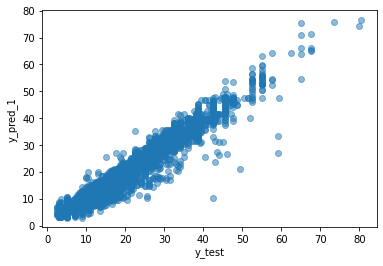

In [68]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_1")
plt.show()

In [69]:
fare_test = pd.DataFrame(y_pred_1, columns = ['fare'])
fare_test.head()

,fare
0,10.588565
1,26.853690
2,17.461066
3,12.980585
4,10.155421


In [70]:
# saving the dataframe
#fare_test.to_csv('submission.csv')

In [71]:
from sklearn.model_selection import RandomizedSearchCV


In [72]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [73]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [74]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  39.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   39.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  37.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  34.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  35.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  32.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total= 1.2min
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  11.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  12.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  12.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  14.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  14.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 55.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [77]:
prediction = rf_random.predict(X_test)


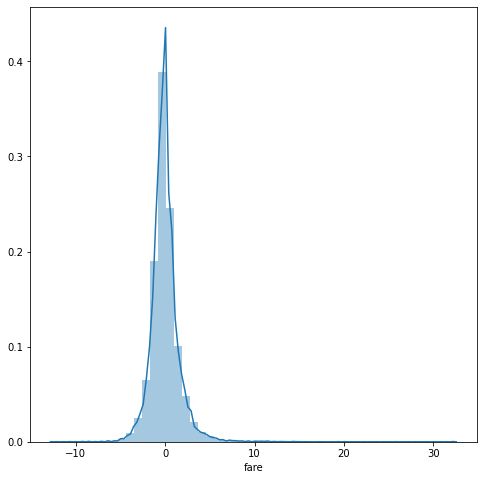

In [78]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [79]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

RMSE: 1.6553053657870413


In [80]:
prediction_1 = rf_random.predict(data_test)


In [81]:
prediction_1

array([10.69112527, 26.84291664, 17.53767165, ..., 33.04883013,
        6.53143693, 20.19602101])

In [82]:
fare_test_2 = pd.DataFrame(prediction_1, columns = ['fare'])
fare_test_2.head()

,fare
0,10.691125
1,26.842917
2,17.537672
3,12.995534
4,10.145850


In [83]:
fare_test_2.to_csv('submission_2.csv')

In [84]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

In [85]:
print(selection.feature_importances_)


[1.40647042e-01 4.18419754e-02 2.58502329e-01 2.16919656e-03
 9.04218897e-02 2.57066422e-01 3.20554891e-02 6.07184926e-03
 4.56640960e-02 2.52188424e-02 2.85326847e-02 8.13788099e-03
 4.13608011e-02 9.33778039e-04 8.70574111e-04 3.87966607e-04
 4.67870571e-03 2.50629548e-04 4.73604910e-04 7.31904553e-04
 5.77662723e-04 7.47828211e-04 4.22294012e-04 3.59609964e-04
 1.03554493e-03 8.98255338e-04 3.85839391e-04 3.59697913e-03
 6.75551033e-04 9.14373002e-04 2.61225035e-04 5.26536454e-04
 3.61895229e-04 3.83022048e-04 2.61420134e-04 2.57430095e-03]


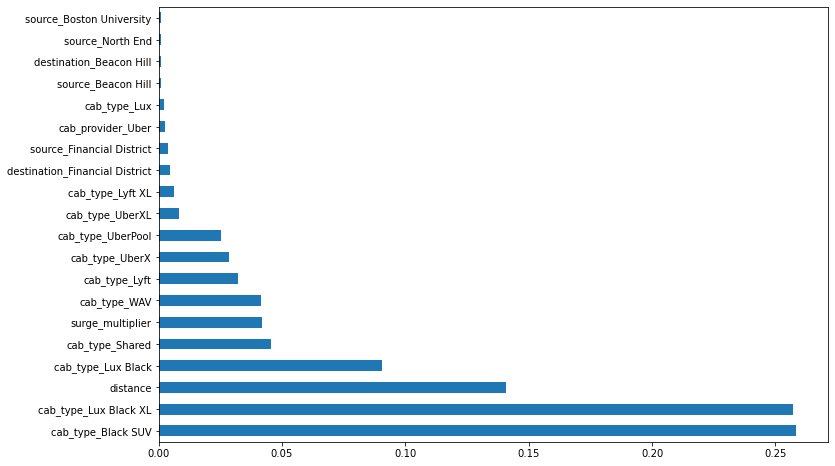

In [86]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [87]:
from math import sqrt 
from sklearn.metrics import mean_absolute_error

In [ ]:
#X_train, X_test, y_train, y_test

In [88]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'gbdt',  
         'metric': 'mae',
         'learning_rate': 0.2, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_test)
print('RMSLE:', sqrt(mean_absolute_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

C:\Users\haris\anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\haris\anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds
[100]	valid_0's l1: 1.09745
[200]	valid_0's l1: 1.07303
[300]	valid_0's l1: 1.06517
[400]	valid_0's l1: 1.06059
[500]	valid_0's l1: 1.058
[600]	valid_0's l1: 1.05602
[700]	valid_0's l1: 1.05591
[800]	valid_0's l1: 1.05484
[900]	valid_0's l1: 1.05318
[1000]	valid_0's l1: 1.05269
Did not meet early stopping. Best iteration is:
[980]	valid_0's l1: 1.05194
RMSLE: 2697843515308761.0


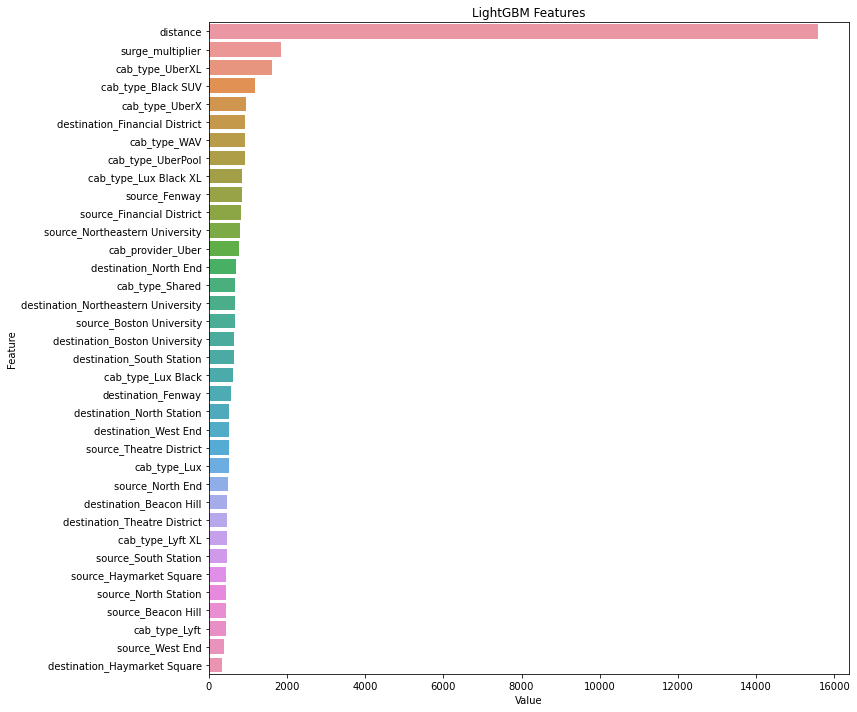

In [89]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [94]:
y_pred_test = lgbm.predict(data_test)


In [92]:
#X_test.head()

In [93]:
#data_test.head()

In [95]:
y_pred_test

array([10.73192547, 26.52890698, 18.02907074, ..., 33.09660577,
        6.54286013, 20.01181094])

In [96]:
y_pred_test_gb_fib = np.expm1(np.mean(y_pred_test,0))
y_pred_test_gb_fib

14439194.693910187

In [97]:
fare_test_4 = pd.DataFrame(y_pred_test, columns = ['fare'])
fare_test_4.head()

,fare
0,10.731925
1,26.528907
2,18.029071
3,13.061229
4,10.035383


In [98]:
fare_test_4.to_csv('submission.csv')

In [100]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=500, max_depth=31, learning_rate=0.1, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", sqrt(mean_absolute_error(y_test, y_pred_lgbm)))

    errlgb.append(sqrt(mean_absolute_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(data_test)
    y_pred_totlgb.append(p)

RMSLE LGBM:  1.0275964395369857
RMSLE LGBM:  1.0334556678711155
RMSLE LGBM:  1.0257438915609192
RMSLE LGBM:  1.0283400218444325
RMSLE LGBM:  1.0193954305031365
RMSLE LGBM:  1.016512136509667
RMSLE LGBM:  1.016958487824778
RMSLE LGBM:  1.0331405686363777
RMSLE LGBM:  1.0235233966913972
RMSLE LGBM:  1.0236847811438279


In [101]:
100-np.mean(errlgb,0)


98.97516491778774

In [102]:
y_pred_totlgb

[array([10.73799477, 26.79176008, 18.00802975, ..., 33.04356271,
         6.55976834, 19.7539082 ]),
 array([10.72213402, 26.8222549 , 18.38577115, ..., 32.83651981,
         6.47187477, 19.88595374]),
 array([10.74875023, 26.77787394, 18.13649163, ..., 32.84478685,
         6.66058828, 19.81484344]),
 array([10.71643094, 26.69282219, 17.97000302, ..., 32.91893743,
         6.50194191, 19.83960258]),
 array([10.70590425, 26.83064881, 17.03144221, ..., 32.80163298,
         6.70757704, 19.75885669]),
 array([10.75122707, 26.77921105, 17.61754165, ..., 33.08619955,
         6.5251173 , 19.94067592]),
 array([10.76814704, 26.78114883, 17.59075576, ..., 32.82597153,
         5.81395171, 19.9039708 ]),
 array([10.7199056 , 26.83423329, 18.08085763, ..., 33.02139306,
         6.64183385, 19.75536932]),
 array([10.70587063, 26.8126161 , 18.32951683, ..., 32.86939096,
         6.62844474, 19.81663535]),
 array([10.73675529, 26.89817481, 17.89348718, ..., 32.8901383 ,
         6.52480984, 19.93

In [103]:
lgbm_final=y_pred_totlgb[0]*0.6+y_pred_totlgb[1]*0.4


In [104]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([10.73131198, 26.8020744 , 17.90438968, ..., 32.91385332,
        6.50359078, 19.8407889 ])

In [105]:
fare_test_4 = pd.DataFrame(lgbm_final, columns = ['fare'])
fare_test_4.head()

,fare
0,10.731312
1,26.802074
2,17.904390
3,13.086832
4,10.106828


In [106]:
fare_test_4.to_csv('submission.csv')

In [108]:
from sklearn.ensemble import GradientBoostingRegressor


In [109]:
from sklearn.model_selection import KFold

errgb = []
y_pred_totgb = []

fold = KFold(n_splits=20, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
             
    gb = GradientBoostingRegressor(learning_rate=0.001, n_estimators=100, random_state=101, subsample=0.8, loss='ls')
    #gb = GradientBoostingRegressor(learning_rate=0.01, n_estimators=100, random_state=101, subsample=0.8,loss='ls')
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    print('Score', 100-sqrt(mean_absolute_error(y_test, y_pred)))

    errgb.append(sqrt(mean_absolute_error(y_test, y_pred)))
    p = gb.predict(data_test)
    y_pred_totgb.append(p)

Score 97.33524006287983
Score 97.31134873856415
Score 97.29730217900486
Score 97.31252667826277
Score 97.31023079253129
Score 97.30125683241265
Score 97.31454092741416
Score 97.32387069312354
Score 97.3165174048501
Score 97.32885494560271
Score 97.32599463670611
Score 97.3304430898954
Score 97.34155144331625
Score 97.32584233751956
Score 97.33904507649343
Score 97.31335086202938
Score 97.34496635940789
Score 97.31777732915147
Score 97.34978005680003
Score 97.32994498373236


In [110]:
np.mean(errgb,0)


2.676480728515104

In [114]:
y_pred_totgb

[array([16.19850513, 17.690792  , 16.19850513, ..., 18.40984   ,
        16.19850513, 16.19850513]),
 array([16.20317496, 17.69905597, 16.20317496, ..., 18.42303803,
        16.20317496, 16.20317496]),
 array([16.20055141, 17.69714245, 16.20055141, ..., 18.4165825 ,
        16.20055141, 16.20055141]),
 array([16.19136737, 17.68590992, 16.19136737, ..., 18.41092916,
        16.19136737, 16.19136737]),
 array([16.19290987, 17.68685083, 16.19290987, ..., 18.40637184,
        16.19290987, 16.19290987]),
 array([16.18882125, 17.69045564, 16.18882125, ..., 18.40143982,
        16.18882125, 16.18882125]),
 array([16.19386514, 17.69070805, 16.19386514, ..., 18.42280039,
        16.19386514, 16.19386514]),
 array([16.18796784, 17.68236331, 16.18796784, ..., 18.40164632,
        16.18796784, 16.18796784]),
 array([16.19069054, 17.69343908, 16.19069054, ..., 18.40920145,
        16.19069054, 16.19069054]),
 array([16.20313884, 17.69986389, 16.20313884, ..., 18.42535904,
        16.20313884, 16.20

In [115]:
lgbm_final=y_pred_totlgb[0]*0.6+y_pred_totlgb[1]*0.4


In [116]:
lgbm_final_1 = np.mean(y_pred_totlgb,0)
lgbm_final_1

array([10.73131198, 26.8020744 , 17.90438968, ..., 32.91385332,
        6.50359078, 19.8407889 ])

In [111]:
cat_final = np.mean(y_pred_totgb,0)
cat_final

array([16.19444079, 17.69059042, 16.19444079, ..., 18.41207075,
       16.19444079, 16.19444079])

In [117]:
fare_test_5 = pd.DataFrame(lgbm_final_1, columns = ['fare'])
fare_test_5.head()

,fare
0,10.731312
1,26.802074
2,17.904390
3,13.086832
4,10.106828


In [118]:
fare_test_5.to_csv('submission.csv')